In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import random

from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split, StratifiedKFold, GridSearchCV
from sklearn.metrics import accuracy_score

In [2]:
readdata = pd.read_csv("clinical_data.csv").drop(columns=['case_id'])


readdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 991 entries, 0 to 990
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ajcc_pathologic_stage   991 non-null    int64  
 1   days_to_last_follow_up  991 non-null    float64
 2   primary_diagnosis       991 non-null    object 
 3   prior_malignancy        991 non-null    object 
 4   year_of_diagnosis       991 non-null    float64
 5   prior_treatment         991 non-null    object 
 6   pharm_treatment         991 non-null    int64  
 7   radiation               991 non-null    int64  
 8   ethnicity               991 non-null    object 
 9   race                    991 non-null    object 
 10  vital_status            991 non-null    object 
 11  age_at_index            991 non-null    int64  
 12  year_of_birth           991 non-null    float64
dtypes: float64(3), int64(4), object(6)
memory usage: 100.8+ KB


In [3]:
readdata

,ajcc_pathologic_stage,days_to_last_follow_up,primary_diagnosis,prior_malignancy,year_of_diagnosis,prior_treatment,pharm_treatment,radiation,ethnicity,race,vital_status,age_at_index,year_of_birth
0,1,337.0,"Infiltrating duct carcinoma, NOS",no,2010.0,No,1,0,not hispanic or latino,white,Alive,60,1950.0
1,3,5.0,"Infiltrating duct carcinoma, NOS",no,2010.0,No,0,0,not hispanic or latino,white,Alive,56,1954.0
2,1,759.0,"Lobular carcinoma, NOS",yes,2012.0,No,1,0,not hispanic or latino,white,Alive,61,1951.0
3,5,954.0,"Lobular carcinoma, NOS",yes,2010.0,No,1,1,not hispanic or latino,white,Alive,71,1939.0
4,8,304.0,"Infiltrating duct carcinoma, NOS",no,2009.0,No,1,0,not reported,not reported,Alive,76,1933.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
986,1,2813.0,"Infiltrating duct carcinoma, NOS",no,2003.0,No,1,1,not hispanic or latino,white,Alive,60,1943.0
987,8,5.0,"Infiltrating duct carcinoma, NOS",no,2013.0,No,0,0,not hispanic or latino,black or african american,Alive,35,1978.0
988,1,1532.0,"Infiltrating duct carcinoma, NOS",no,2009.0,No,1,0,not hispanic or latino,black or african american,Alive,46,1963.0
989,3,375.0,"Lobular carcinoma, NOS",no,2011.0,No,1,1,not hispanic or latino,white,Alive,71,1940.0


### Exploratory Data Visualization

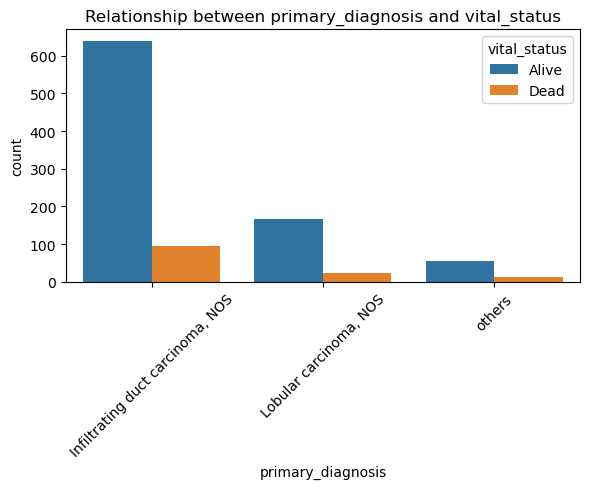

<Figure size 640x480 with 0 Axes>

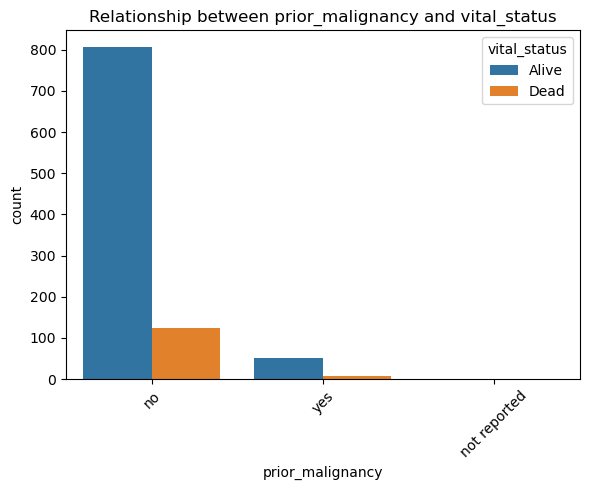

<Figure size 640x480 with 0 Axes>

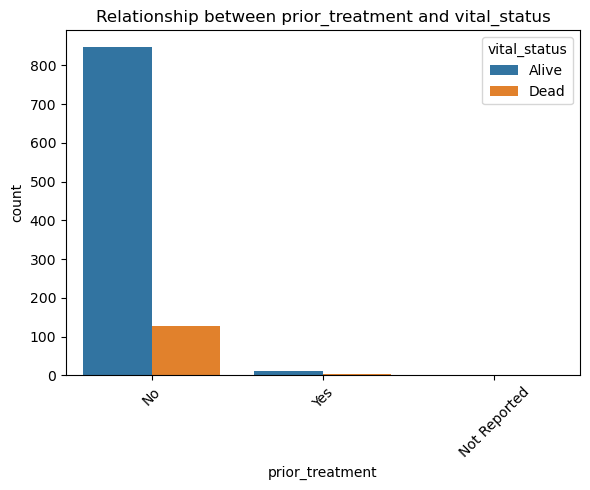

<Figure size 640x480 with 0 Axes>

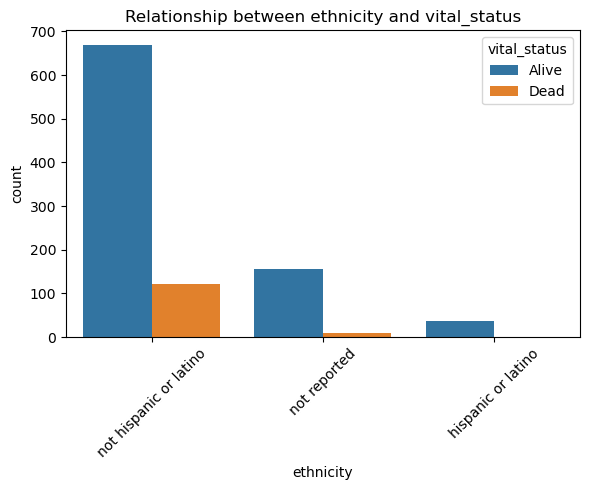

<Figure size 640x480 with 0 Axes>

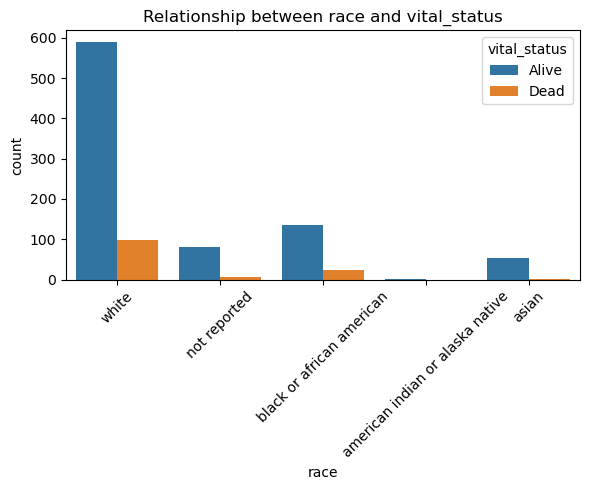

<Figure size 640x480 with 0 Axes>

In [4]:
target_variable = 'vital_status'
# Function to visualize categorical features
def visualize_categorical_features(df, target_variable):
    categorical_columns = df.select_dtypes(include=['object']).columns
    categorical_columns = [col for col in categorical_columns if col != target_variable]
    for column in categorical_columns:
        plt.figure(figsize=(6, 5))
        sns.countplot(x=column, hue=target_variable, data=df)
        plt.title(f'Relationship between {column} and {target_variable}')
        plt.xticks(rotation=45)
        plt.grid(False)
        plt.tight_layout()
        plt.savefig(f"{column}.png", bbox_inches='tight')
        plt.show()
        plt.clf()

# Visualize categorical features
visualize_categorical_features(readdata, target_variable)

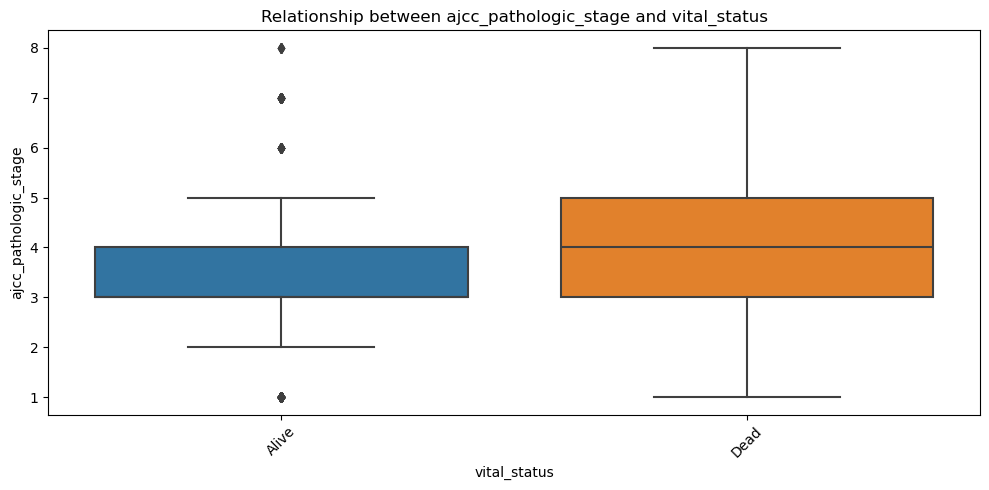

<Figure size 640x480 with 0 Axes>

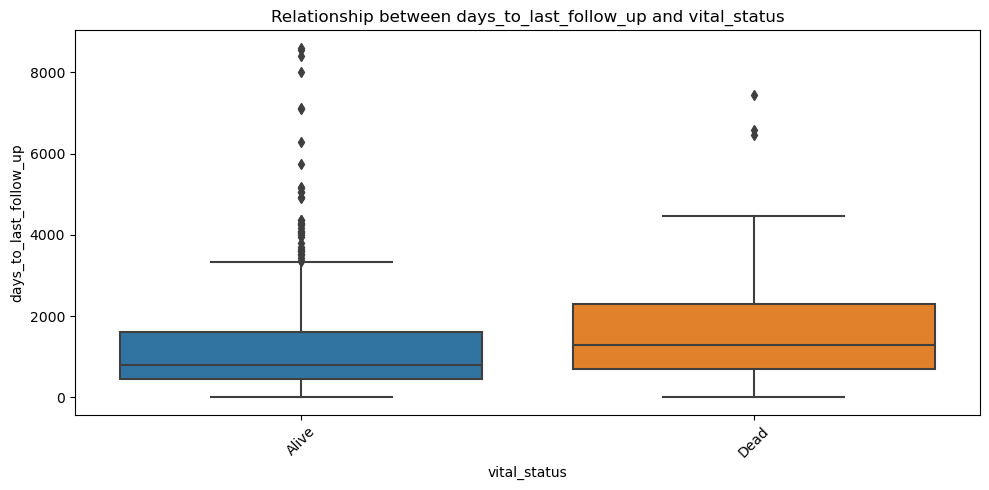

<Figure size 640x480 with 0 Axes>

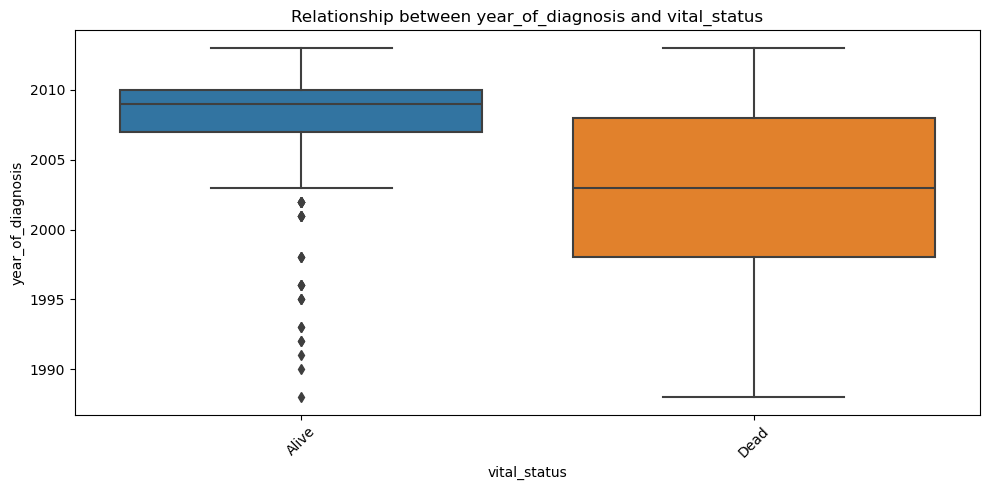

<Figure size 640x480 with 0 Axes>

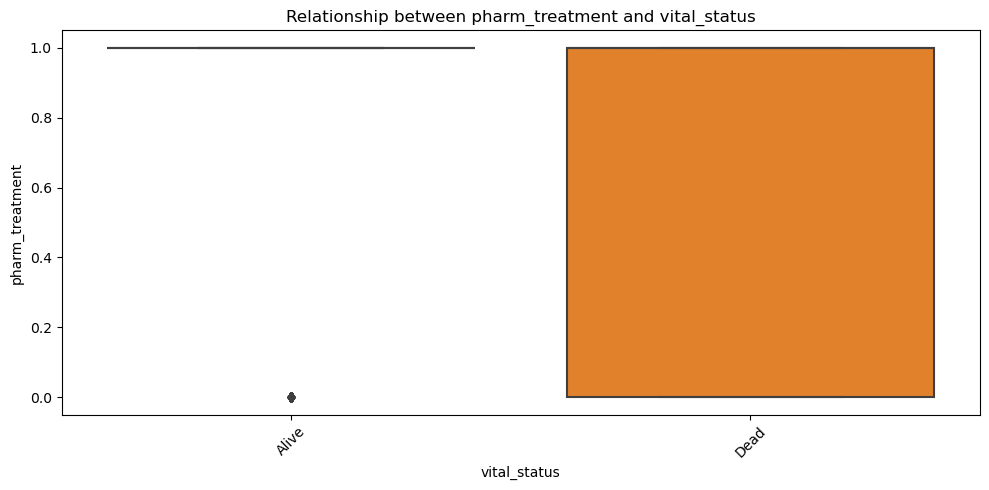

<Figure size 640x480 with 0 Axes>

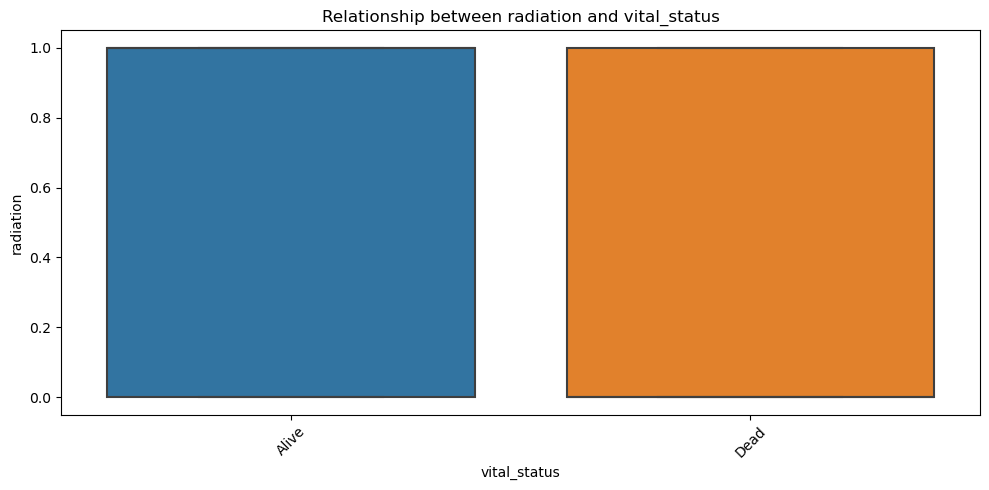

<Figure size 640x480 with 0 Axes>

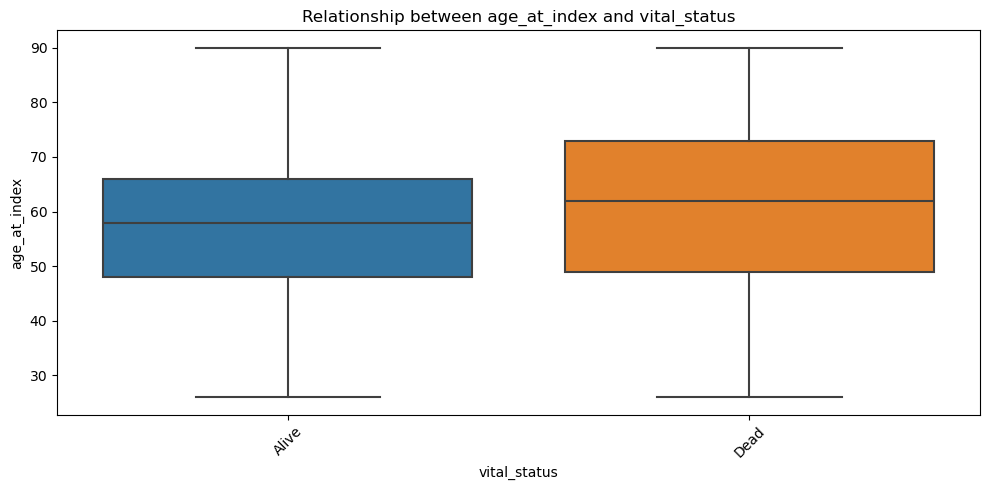

<Figure size 640x480 with 0 Axes>

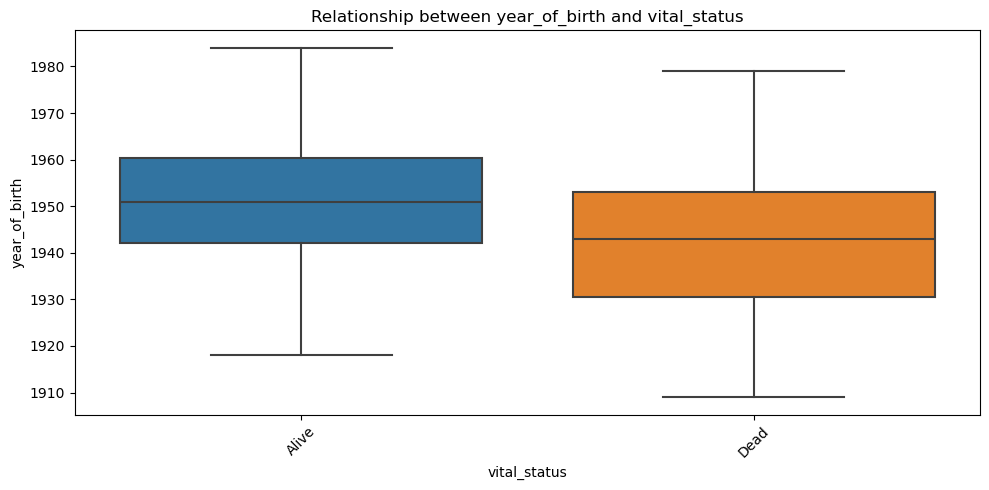

<Figure size 640x480 with 0 Axes>

In [5]:
# Function to visualize continuous features
def visualize_continuous_features(df, target_variable):
    continuous_columns = df.select_dtypes(include=['float64', 'int64']).columns
    for column in continuous_columns:
        plt.figure(figsize=(10, 5))
        sns.boxplot(x=target_variable, y=column, data=df)
        plt.title(f'Relationship between {column} and {target_variable}')
        plt.xticks(rotation=45)
        plt.grid(False)
        plt.tight_layout()
        plt.savefig(f"{column}.png", bbox_inches='tight')
        plt.show()
        plt.clf()


# Visualize continuous features
visualize_continuous_features(readdata, target_variable)

#### Data Analysis

In [6]:
# separate features from target variable and encode y as 0 or 1

df = readdata.copy().drop(columns='vital_status', axis=1)
y = np.array(1*pd.get_dummies(readdata.copy()['vital_status'], drop_first=True)).ravel()

In [7]:
# Drop days_to_last_follow_up from feature set, this information will not be available at the time of prognosis
df.drop('days_to_last_follow_up',axis=1,inplace=True)

In [8]:
categorical_columns = [col for col in df.columns if df[col].dtype == "object"]
print(f"The categorical columns are: {categorical_columns} and the length is {len(categorical_columns)}.")

continuous_columns = [cols for cols in df.columns if df[cols].dtype in ["float64", "int64"]]
print(f"The continuous columns are: {continuous_columns} and the length is {len(continuous_columns)}.")

boolean_columns = [col_ for col_ in df.columns if df[col_].dtype == "bool"]
print(f"The boolean columns are: {boolean_columns} and the length is {len(boolean_columns)}.")

The categorical columns are: ['primary_diagnosis', 'prior_malignancy', 'prior_treatment', 'ethnicity', 'race'] and the length is 5.
The continuous columns are: ['ajcc_pathologic_stage', 'year_of_diagnosis', 'pharm_treatment', 'radiation', 'age_at_index', 'year_of_birth'] and the length is 6.
The boolean columns are: [] and the length is 0.


In [9]:
# one hot encode categorical columns
df2 = df[categorical_columns].copy()
# Iterate through each column in the dataframe
for column in categorical_columns:
    one_hot = pd.get_dummies(df2[column], prefix=column).astype(int)
    # Drop the original column from the dataframe
    df2.drop(column, axis=1, inplace=True)
    # Join the new one-hot encoded columns to the original dataframe
    df2 = df2.join(one_hot)

In [10]:
# concatenate the continuous dataframe and one-hot encoded dataframe
new_df = pd.concat([df[continuous_columns], df2], axis=1)

In [11]:
# save the one hot encoded data

new_df.to_csv("one_hot_encoded_data.csv", index=False)

In [12]:
from sklearn.metrics import confusion_matrix

In [13]:
random.seed(123)

# first split data into train and test
xtrain_, xtest, ytrain_, ytest = train_test_split(new_df, y, train_size=0.8, shuffle=True, stratify=y, random_state=123)

# scale data
scale = MinMaxScaler()
xtrain_ = scale.fit_transform(xtrain_)
xtest = scale.transform(xtest)

# perform stratified k-fold to split xtrain_ into xtrain_train and validation sets
skf = StratifiedKFold(n_splits=3, shuffle=True, random_state=123)

basemodel = DecisionTreeClassifier(random_state=123)
best_model = None
best_val_score = -np.inf

base_scores = []
model_scores = []
model_precision = []
model_recall = []
model_selectivity = []
model_fp = [] 
model_fn = []

# Perform stratified k-fold split with nested validation set
for fold, (train_idx, val_idx) in enumerate(skf.split(xtrain_, ytrain_)):
    xtrain_train, ytrain_train = xtrain_[train_idx], ytrain_[train_idx]
    xval, yval = xtrain_[val_idx], ytrain_[val_idx]

    # train base model
    basemodel.fit(xtrain_train, ytrain_train)
    base_val_pred = basemodel.predict(xval)
    base_val_score = accuracy_score(yval, base_val_pred)
    
    TN = confusion_matrix(yval, base_val_pred)[0,0]
    FP = confusion_matrix(yval, base_val_pred)[0,1]
    FN = confusion_matrix(yval, base_val_pred)[1,0]
    TP = confusion_matrix(yval, base_val_pred)[1,1]
        
    precision = np.round(TP/(TP + FP),4)
    recall = np.round(TP/(TP+FN),4)
    selectivity = np.round(TN/(TN+FP),4)
    fp = np.round(FP/(FP+TN),4)
    fn = np.round(FN/(TP+FN),4)
    
    base_scores.append([base_val_score,precision,recall,selectivity,fp,fn])

    # Train multiple models
    models = {'rf': RandomForestClassifier(random_state=123),
              'adaboost': AdaBoostClassifier(algorithm='SAMME'),
              'svc': SVC(),
              'logreg': LogisticRegression(max_iter=1000),
              'knn': KNeighborsClassifier(n_neighbors=10),
              'mlp': MLPClassifier(max_iter=10000)
              } # decisiontreeclassifier is our base model, thus we compare our results to this model.

    for model_name, model in models.items():
        # Train the model
        model.fit(xtrain_train, ytrain_train)
        # Validate the model
        y_val_predict = model.predict(xval)
        val_score = accuracy_score(yval, y_val_predict)

        #print(f"Fold {fold + 1}, Model: {model_name}, Validation Accuracy: {val_score:.4f}")

        model_scores.append((model_name, val_score))
        
        ## Other classification metrics
        TN = confusion_matrix(yval, y_val_predict)[0,0]
        FP = confusion_matrix(yval, y_val_predict)[0,1]
        FN = confusion_matrix(yval, y_val_predict)[1,0]
        TP = confusion_matrix(yval, y_val_predict)[1,1]
        
        precision = np.round(TP/(TP + FP),4)
        recall = np.round(TP/(TP+FN),4)
        selectivity = np.round(TN/(TN+FP),4)
        fp = np.round(FP/(FP+TN),4)
        fn = np.round(FN/(TP+FN),4)    
        
        model_precision.append((model_name,precision))
        model_recall.append((model_name,recall))
        model_selectivity.append((model_name,selectivity))
        model_fp.append((model_name,fp))
        model_fn.append((model_name,fn))

In [14]:
# Print average accuracy of the base model
base_averages = [item[0] for item in base_scores]
average_base_score = np.mean(base_averages)
print(f"Average Validation Accuracy of the Base Model: {average_base_score:.4f}")

# Calculate average validation accuracy for each model and find the best model
average_model_scores = {}
list_scores = []
for model_name, model in models.items():
    for name, score in model_scores:
        if name == model_name:
            list_scores.append(score)
    average = np.mean(list_scores)
    average_model_scores[model_name] = average
    list_scores = []
    
best_model_name = max(average_model_scores, key=average_model_scores.get)
best_model_avg_score = average_model_scores[best_model_name]

print(f"Best Model: {best_model_name} with Average Validation Accuracy: {best_model_avg_score:.4f}")

Average Validation Accuracy of the Base Model: 0.8485
Best Model: logreg with Average Validation Accuracy: 0.9015


In [15]:
average_model_scores

{'rf': 0.8926767676767676,
 'adaboost': 0.8926767676767676,
 'svc': 0.8914141414141413,
 'logreg': 0.9015151515151515,
 'knn': 0.8926767676767676,
 'mlp': 0.8914141414141413}

In [16]:
# Print average precision of the base model
base_precision = [item[1] for item in base_scores]
average_base_precision = np.mean(base_precision)
print(f"Average Validation precision of the Base Model: {average_base_precision:.4f}")

# Calculate average validation precision for each model and find the best model
average_model_precision = {}
list_scores = []
for model_name, model in models.items():
    for name, score in model_precision:
        if name == model_name:
            list_scores.append(score)
    average = np.mean(list_scores)
    average_model_precision[model_name] = average
    list_scores = []
    
best_model_name = max(average_model_precision, key=average_model_precision.get)
best_model_avg_precision = average_model_precision[best_model_name]

print(f"Best Model: {best_model_name} with Average Validation Precision: {best_model_avg_precision:.4f}")

Average Validation precision of the Base Model: 0.4365
Best Model: knn with Average Validation Precision: 0.9250


In [17]:
average_model_precision

{'rf': 0.6522333333333333,
 'adaboost': 0.6651666666666667,
 'svc': 0.9110999999999999,
 'logreg': 0.8328000000000001,
 'knn': 0.9249999999999999,
 'mlp': 0.6323666666666666}

In [18]:
# Print average Sensitivity of the base model
base_recall = [item[2] for item in base_scores]
average_base_recall = np.mean(base_recall)
print(f"Average Validation recall of the Base Model: {average_base_recall:.4f}")

# Calculate average validation recall for each model and find the best model
average_model_recall = {}
list_scores = []
for model_name, model in models.items():
    for name, score in model_recall:
        if name == model_name:
            list_scores.append(score)
    average = np.mean(list_scores)
    average_model_recall[model_name] = average
    list_scores = []
    
best_model_name = max(average_model_recall, key=average_model_recall.get)
best_model_avg_recall = average_model_recall[best_model_name]

print(f"Best Model: {best_model_name} with Average Validation Sensitivity: {best_model_avg_recall:.4f}")

Average Validation recall of the Base Model: 0.5333
Best Model: mlp with Average Validation Sensitivity: 0.4381


In [19]:
average_model_recall

{'rf': 0.4190666666666667,
 'adaboost': 0.3905,
 'svc': 0.20950000000000002,
 'logreg': 0.32380000000000003,
 'knn': 0.20950000000000002,
 'mlp': 0.4381}

In [20]:
# Print average selectivity of the base model
base_selectivity = [item[3] for item in base_scores]
average_base_selectivity = np.mean(base_selectivity)
print(f"Average Validation selectivity of the Base Model: {average_base_selectivity:.4f}")

# Calculate average validation selectivity for each model and find the best model
average_model_selectivity = {}
list_scores = []
for model_name, model in models.items():
    for name, score in model_selectivity:
        if name == model_name:
            list_scores.append(score)
    average = np.mean(list_scores)
    average_model_selectivity[model_name] = average
    list_scores = []
    
best_model_name = max(average_model_selectivity, key=average_model_selectivity.get)
best_model_avg_selectivity = average_model_selectivity[best_model_name]

print(f"Best Model: {best_model_name} with Average Validation selectivity: {best_model_avg_selectivity:.4f}")

Average Validation selectivity of the Base Model: 0.8967
Best Model: knn with Average Validation selectivity: 0.9971


In [21]:
average_model_selectivity

{'rf': 0.9650666666666666,
 'adaboost': 0.9694333333333333,
 'svc': 0.9956333333333333,
 'logreg': 0.9897999999999999,
 'knn': 0.9970666666666667,
 'mlp': 0.9607}

In [22]:
# Print average false postivity of the base model
base_fp = [item[4] for item in base_scores]
average_base_fp = np.mean(base_fp)
print(f"Average Validation false positivity of the Base Model: {average_base_fp:.4f}")

# Calculate average validation fp for each model and find the best model
average_model_fp = {}
list_scores = []
for model_name, model in models.items():
    for name, score in model_fp:
        if name == model_name:
            list_scores.append(score)
    average = np.mean(list_scores)
    average_model_fp[model_name] = average
    list_scores = []
    
best_model_name = min(average_model_fp, key=average_model_fp.get)
best_model_avg_fp = average_model_fp[best_model_name]

print(f"Best Model: {best_model_name} with Average Validation false positivity: {best_model_avg_fp:.4f}")

Average Validation false positivity of the Base Model: 0.1033
Best Model: knn with Average Validation false positivity: 0.0029


In [23]:
average_model_fp

{'rf': 0.03493333333333334,
 'adaboost': 0.03056666666666667,
 'svc': 0.004366666666666667,
 'logreg': 0.0102,
 'knn': 0.0029333333333333334,
 'mlp': 0.0393}

In [24]:
# Print average false negativity of the base model
base_fn = [item[5] for item in base_scores]
average_base_fn = np.mean(base_fn)
print(f"Average Validation false negativity of the Base Model: {average_base_fn:.4f}")

# Calculate average validation fn for each model and find the best model
average_model_fn = {}
list_scores = []
for model_name, model in models.items():
    for name, score in model_fn:
        if name == model_name:
            list_scores.append(score)
    average = np.mean(list_scores)
    average_model_fn[model_name] = average
    list_scores = []
    
best_model_name = min(average_model_fn, key=average_model_fn.get)
best_model_avg_fn = average_model_fn[best_model_name]

print(f"Best Model: {best_model_name} with Average Validation false negativity: {best_model_avg_fn:.4f}")

Average Validation false negativity of the Base Model: 0.4667
Best Model: mlp with Average Validation false negativity: 0.5619


In [25]:
average_model_fn

{'rf': 0.5809333333333333,
 'adaboost': 0.6095,
 'svc': 0.7905000000000001,
 'logreg': 0.6762,
 'knn': 0.7905000000000001,
 'mlp': 0.5619000000000001}

To balance model accuracy with sensitivity, and for simplicity, we select random forest for further tuning. We obtain modest improvements in performance.

In [26]:
param_grid = {
        'n_estimators': [100, 200, 300],
        'max_depth': [None, 10, 20, 30]
    }
grid_search = GridSearchCV(RandomForestClassifier(random_state=123), param_grid, cv=skf, scoring='accuracy')

# Fit the grid search
grid_search.fit(xtrain_, ytrain_)
best_tuned_model = grid_search.best_estimator_
print(f"Best Model Hyperparameters: {grid_search.best_params_}")

# Test the best tuned model on the test set
test_predictions = best_tuned_model.predict(xtest)
test_score = accuracy_score(ytest, test_predictions)

test_TN = confusion_matrix(ytest, test_predictions)[0,0]
test_FP = confusion_matrix(ytest, test_predictions)[0,1]
test_FN = confusion_matrix(ytest, test_predictions)[1,0]
test_TP = confusion_matrix(ytest, test_predictions)[1,1]

test_precision = np.round(test_TP/(test_TP + test_FP),4)
test_recall = np.round(test_TP/(test_TP+test_FN),4)
test_selectivity = np.round(test_TN/(test_TN+test_FP),4)
test_FP = np.round(test_FP/(test_FP+test_TN),4)
test_FN = np.round(test_FN/(test_TP+test_FN),4)    

print(f"Accuracy: {test_score:.4f}")
print(f"Precision: {test_precision:.4f}")
print(f"Sensitivity: {test_recall:.4f}")
print(f"False negative rate: {test_FN:.4f}")

Best Model Hyperparameters: {'max_depth': 10, 'n_estimators': 100}
Accuracy: 0.9246
Precision: 0.8235
Sensitivity: 0.5385
False negative rate: 0.4615
